In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sqlalchemy import create_engine
from sshtunnel import SSHTunnelForwarder
import testing
import matplotlib.pyplot as plt
from time import time
import numpy as np
ip = "147.32.83.171"

C:\Users\zdesi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
ssh_tunnel = SSHTunnelForwarder(
    ip,
        ssh_username='syrovzde',
        ssh_private_key='C:\\Users\\zdesi\\.ssh\\syrovzde_rsa',
        remote_bind_address=('localhost', 5432)
    )
ssh_tunnel.start()
engine = create_engine("postgresql://{user}@{host}:{port}/{db}".format(
        host='localhost',
        port=ssh_tunnel.local_bind_port,
        user='syrovzde',
        db='asianodds'
    ))
result_engine = create_engine("postgresql://{user}@{host}:{port}/{db}".format(
        host='localhost',
        port=ssh_tunnel.local_bind_port,
        user='syrovzde',
        db='betexplorer'
    ))
print("completed")


completed


In [28]:
testing_probs = [0.5,0.6,0.7,0.8,0.9,1]
profits_w = {}
betting_vectors_w = {}
times_w = {}
matchids_w = {}
for p in testing_probs:
   print(p)
   start_time = time()
   profits_w[p],betting_vectors_w[p],matchids_w[p]=testing.test(p=p, timestamp='2022-11-16 21:00:00',engine=engine,res_engine=result_engine,weights=[])

   end_time = time()
   times_w[p] = end_time-start_time

   testing_probs = [0.5,0.6,0.7,0.8,0.9,0.95,1]
profits = {}
betting_vectors = {}
times = {}
matchids = {}
for p in testing_probs:
   print(p)
   start_time = time()
   profits[p],betting_vectors[p],matchids[p]=testing.test(p=p, timestamp='2022-11-16 21:00:00',engine=engine,res_engine=result_engine)
   end_time = time()
   times[p] = end_time-start_time

0.5
1629
0.6
1629
0.7
1629
0.8
1629
0.9
1629
1
1629
0.5
1629
0.6
1629
0.7
1629
0.8
1629
0.9
1629
0.95
1629
1
1629


In [34]:
testing_probs = [0.5,0.6,0.7,0.8,0.9,1]
cumulative_sums = {}
lengths = {}
for p in testing_probs:
    #cumulative_sums[p]=np.cumsum(results[p])
    #lengths[p] = len(results[p])
    print(sum(profits[p])/len(profits[p]))
for p in testing_probs:
    print(sum(profits_w[p])/len(profits_w[p]))



-1547.515616401963
-696.0004563665397
-1192.5109558322981
-264.9641861634959
-421.7175486965626
16.40750884852216
-2239.3903506971606
-1393.570775220024
-1647.731959578971
-537.8327031548122
-867.270754625021
1.0000000000000056


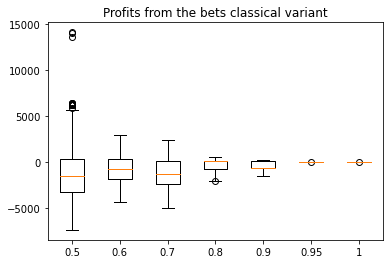

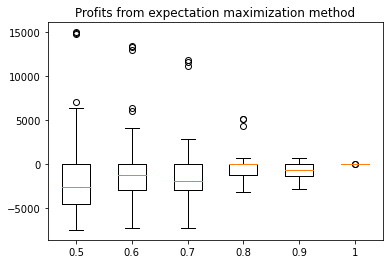

In [35]:
plt.boxplot(profits.values(),labels=profits.keys())
plt.title("Profits from the bets classical variant")
plt.show()

plt.boxplot(profits_w.values(),labels=profits_w.keys())
plt.title("Profits from expectation maximization method")
plt.show()



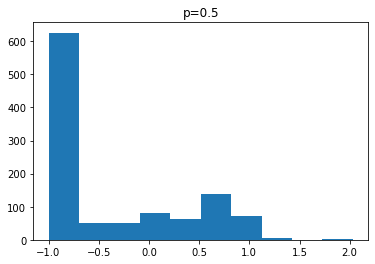

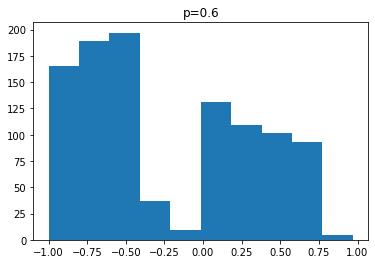

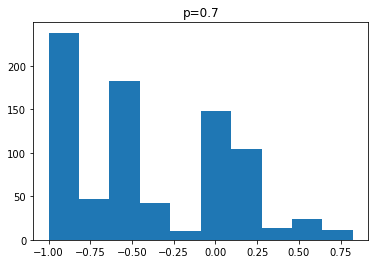

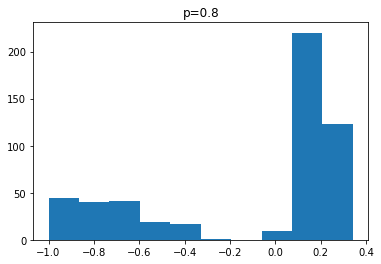

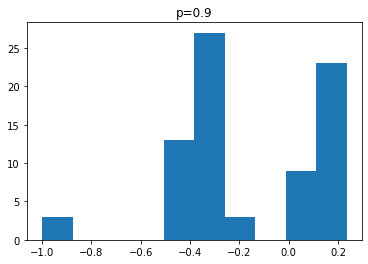

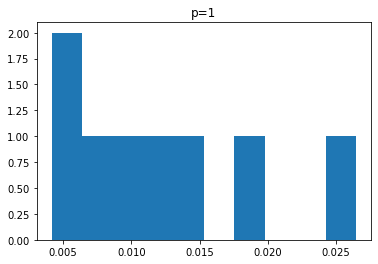

In [36]:
partial_sums = {}
for p in testing_probs:
    partial_sums[p] = []
    for n in betting_vectors[p]:
        #print(n)
        partial_sums[p].append(sum(n[:-1]))
    hlp =np.array(profits[p])/np.array(partial_sums[p])
    plt.hist(hlp)
    plt.title('p={p}'.format(p=p))
    plt.show()

#shows ratio between invested amount and profited amount

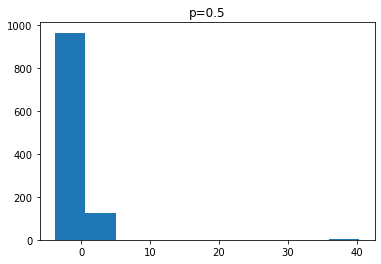

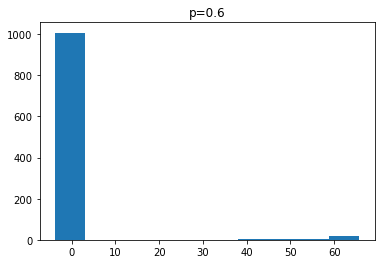

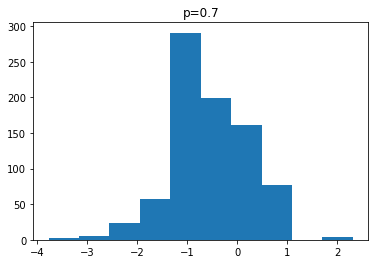

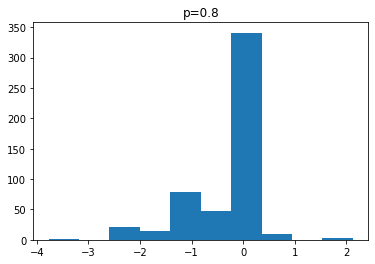

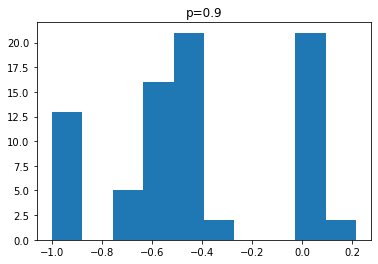

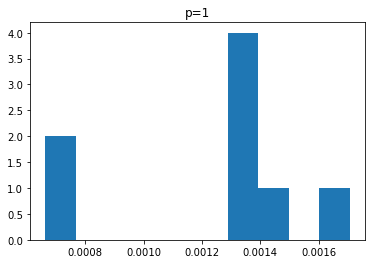

In [37]:
partial_sums = {}
for p in testing_probs:
    partial_sums[p] = []
    for n in betting_vectors_w[p]:
        #print(n)
        partial_sums[p].append(sum(n[:-1]))
    hlp =np.array(profits_w[p])/np.array(partial_sums[p])
    plt.hist(hlp)
    plt.title('p={p}'.format(p=p))
    plt.show()

In [39]:
%store profits
%store betting_vectors
%store times
%store matchids
%store profits_w
%store betting_vectors_w
%store times_w
%store matchids_w

Stored 'profits' (dict)
Stored 'betting_vectors' (dict)
Stored 'times' (dict)
Stored 'matchids' (dict)
Stored 'profits_w' (dict)
Stored 'betting_vectors_w' (dict)
Stored 'times_w' (dict)
Stored 'matchids_w' (dict)
